In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
import random

In [3]:
#Load traning set and display an image
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
#plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
#plt.show()

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

#plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
#plt.show()


In [4]:
avg_Face = []
for i in range(2500):
    tmp = 0
    for row in train_data:
        tmp+=row[i]
    avg_Face.append(tmp/540)

avg_Face = np.array(avg_Face)

In [5]:
#Mean subtraction on training data
for row in train_data:
    row -= avg_Face
#mean subtraction on testing data   
for row in test_data:
    row -= avg_Face

In [6]:
#eigen = np.dot(np.transpose(train_data),train_data)
def eigen_decomposition(X):
    Sigma = X.T.dot(X) / X.shape[0] # form covariance matrix
    eigen_val, eigen_vec = np.linalg.eig(Sigma) # perform eigendecomposition
    eigen_val = eigen_val.real
    eigen_vec = eigen_vec.real
    return eigen_val, eigen_vec

eigen_val, eigen_vec = eigen_decomposition(train_data)

In [31]:
def feature_matrix_F (x,eigen_vec,r):
    vt = eigen_vec.T
    f = np.dot(x,vt[:r,:].T)
    
    return f

f = feature_matrix_F(train_data, eigen_vec, 10) #r = 10
f_test = feature_matrix_F(test_data, eigen_vec, 10) #r = 10

In [32]:
print(f)

[[-3071.98503336  -440.55436121  -127.39265075  -648.06365441
   -211.12702156]
 [ 2197.05744965  -760.60052365  -562.46174352  -262.57632317
    -88.70082429]
 [ 2473.33262159   163.06716256   608.22806399  -139.52981091
    -20.6473134 ]
 ...
 [ 1841.10091761  1907.14587095  -226.44323     -439.46419064
    473.63472597]
 [-2586.30249394   163.15381029  -151.68973865   -94.11579911
     97.87166232]
 [ 1363.71276667  2930.60526623  1287.14464964    93.86923561
    539.79806561]]


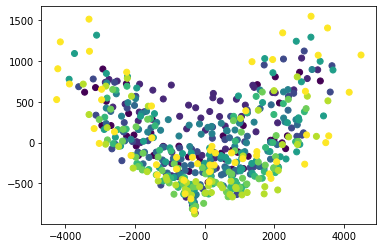

In [33]:
plt.scatter(f[:,-4],f[:,-2], c = train_labels)